In [173]:
from scipy.io.wavfile import read
import numpy as np
import soundfile as sf
import sounddevice as sd
import random
import time
import wave
import struct
import matplotlib.pyplot as plt

samplerate = 44100
file = 'dog.wav'
data, sr = sf.read(file, dtype='int16')
with wave.open(file, 'rb') as wav_file:
    sample_width = wav_file.getsampwidth()
    num_channels = wav_file.getnchannels()
sd.play(data,sr)

In [174]:
print(data,sr)

[[-44 -37]
 [-45 -39]
 [-46 -43]
 ...
 [  0   1]
 [  0   2]
 [  0   0]] 44100


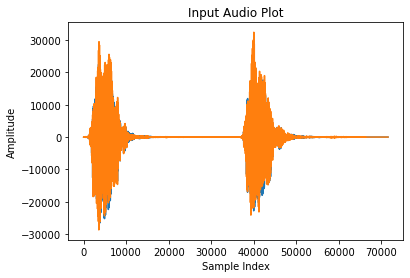

In [175]:
plt.plot(data)
plt.title('Input Audio Plot')
plt.xlabel('Sample Index')
plt.ylabel('Amplitude')
plt.show()

In [176]:

def audio_to_binary(filename):
    with wave.open(filename, "rb") as wav_file:
        # Read the binary data from the wave file
        binary_data = wav_file.readframes(wav_file.getnframes())
        # Unpack the binary data and return it as a list of integers
        audio = list(struct.unpack("B"*len(binary_data), binary_data))
        return np.vectorize(np.binary_repr)(audio, 8)


def binary_to_audio(binary_data, filename, sample_width, channels,sample_rate=44100):
    # Open a wave file for writing
    with wave.open(filename, "w") as wav_file:
        # Set the sample width and number of channels
        wav_file.setsampwidth(sample_width)
        wav_file.setnchannels(channels)
        # Set the sample rate
        wav_file.setframerate(sample_rate)
        # Write the binary data to the wave file
        for byte in binary_data:
            data = struct.pack("B", byte)
            wav_file.writeframes(data)

In [177]:
bin_audio_list = audio_to_binary(file)       #max = 255, min=0 list of binary coded integers

bin_audio_str = ''.join(bin_audio_list)

In [178]:
#binary_to_audio(audio, 'hello.wav')  

In [179]:
def DNA(line, l):
    Base_map = {"00":"A", "01":"G", "10":"C", "11":"T"}
    x=""
    temp = [line[i:i+2] for i in range(0, l, 2)]
    for j in range (l//2) :
         x += Base_map[temp[j]]
    
    return x

def revDNA(line, l):
    Code_map = {"A":"00", "G":"01", "C": "10", "T":"11"}
    x = ""
    temp = [line[i:i+1] for i in range(0,l)]
    for j in range(l):
        x += Code_map[temp[j]]
    return x

In [180]:
def Xor_string(a,b):
    x=''
    for i in range(len(a)):
        if (a[i] == b[i]):
            x+= '0'
        else:
            x+= '1'
    return x

In [181]:
def mapDNA(xorlist):
    j=0
    l = len(xorlist[0])
    x = []
    for xor in xorlist:
        litem = len(xor)
        for i in range(0, litem-1, 2):
            if(xor[i]=='1' and xor[i+1]=='1'):
                x.append((i+j*l)//2)
        j+=1
    return x

In [182]:
keyseq=''
lb = 30
for i in range(lb*2):
    keyseq += str(random.randint(0,1))
b = DNA(keyseq, lb*2)
print(b)

GTGCGAAAAGATCCAAACGTTGGTAGCTTA


In [183]:
with open("key.txt", "w") as file:
    file.write(b)

In [184]:
starttime = time.time()

In [185]:
mapped_array = np.array([DNA(elem, 8) for elem in bin_audio_list])
#print(mapped_array) 

In [186]:
#pre_encrypt = 
a = ''.join(mapped_array)

In [187]:
#print(a)

In [188]:
#key = np.array([random.randrange(2) for _ in range(200)])



In [189]:
#print(revDNA(b, len(b)))

In [190]:
# bin_key = revDNA(b, 47)
# y = int(bin_key[0:17],2) ^ int(bin_audio_str[0:17],2)
# print('{0:b}'.format(y))

In [191]:

la = len(a)
#lb = len(b)
chunk = [a[i:lb+i] for i in range(0, la, lb)]


In [192]:
#print(''.join(chunk))

In [193]:
key_val = revDNA(b, lb)
temp = chunk[len(chunk)-1]
x = Xor_string(key_val[0:len(temp)*2],revDNA(temp, len(temp)))
xorval = [Xor_string(key_val, revDNA(item,lb)) for item in chunk[0:len(chunk)-1]]
xorval.append(x)

#print(xorval)

In [194]:
index = mapDNA(xorval)
print(index)

[5, 6, 7, 8, 14, 15, 16, 17, 24, 29, 33, 36, 37, 38, 40, 42, 43, 44, 45, 46, 54, 68, 70, 73, 75, 76, 84, 95, 96, 100, 104, 115, 119, 123, 125, 126, 127, 128, 131, 134, 135, 136, 144, 149, 156, 157, 158, 160, 163, 164, 165, 166, 170, 174, 179, 185, 186, 188, 190, 196, 200, 203, 207, 210, 215, 219, 221, 224, 225, 227, 233, 234, 237, 238, 245, 246, 247, 256, 258, 268, 271, 282, 289, 293, 301, 306, 311, 319, 320, 323, 327, 328, 329, 341, 349, 350, 354, 357, 358, 361, 369, 378, 380, 383, 385, 388, 391, 395, 410, 413, 418, 419, 421, 431, 439, 447, 448, 449, 461, 465, 469, 470, 473, 475, 477, 478, 500, 503, 505, 508, 511, 515, 522, 533, 538, 541, 546, 551, 553, 554, 559, 560, 561, 567, 568, 570, 581, 589, 590, 597, 598, 602, 617, 619, 620, 623, 628, 631, 641, 642, 649, 653, 659, 671, 674, 676, 684, 689, 695, 696, 697, 700, 704, 705, 719, 725, 726, 727, 728, 729, 734, 735, 736, 744, 745, 749, 755, 756, 757, 758, 760, 764, 765, 766, 770, 774, 786, 787, 788, 790, 793, 796, 804, 815, 816, 820, 82

In [195]:
randlen = [random.randint(1,6) for i in range (len(index))]
print(randlen)
    

[3, 6, 6, 3, 1, 2, 5, 2, 5, 6, 3, 2, 3, 1, 4, 5, 2, 6, 5, 5, 5, 3, 6, 4, 3, 3, 5, 3, 3, 4, 2, 6, 6, 5, 2, 2, 4, 4, 6, 2, 5, 4, 5, 2, 3, 2, 2, 4, 1, 1, 6, 6, 1, 2, 1, 3, 5, 6, 1, 4, 6, 2, 4, 3, 2, 2, 4, 3, 6, 1, 4, 5, 4, 5, 5, 6, 6, 2, 1, 6, 3, 6, 4, 5, 3, 5, 2, 5, 1, 5, 1, 6, 2, 4, 1, 6, 5, 3, 1, 5, 1, 4, 5, 2, 4, 2, 6, 1, 5, 4, 1, 6, 2, 4, 4, 6, 3, 2, 1, 5, 4, 3, 3, 6, 4, 2, 2, 6, 2, 3, 3, 3, 2, 2, 4, 4, 6, 4, 6, 2, 5, 5, 4, 6, 6, 4, 6, 6, 2, 4, 5, 3, 2, 4, 3, 1, 5, 1, 3, 6, 1, 2, 2, 3, 1, 5, 1, 6, 3, 1, 6, 1, 4, 6, 6, 5, 4, 2, 2, 1, 3, 6, 4, 1, 3, 1, 1, 4, 3, 4, 2, 5, 1, 2, 5, 2, 5, 1, 1, 6, 1, 3, 6, 5, 1, 1, 3, 4, 5, 3, 5, 6, 3, 1, 6, 2, 5, 3, 2, 3, 3, 6, 2, 1, 2, 3, 6, 5, 5, 6, 4, 6, 3, 5, 3, 3, 1, 3, 6, 3, 4, 5, 4, 5, 4, 6, 4, 3, 1, 4, 5, 4, 1, 6, 1, 6, 3, 6, 1, 5, 6, 6, 3, 3, 6, 5, 1, 3, 4, 5, 1, 3, 1, 4, 4, 5, 1, 4, 6, 3, 2, 4, 5, 2, 4, 5, 1, 6, 3, 4, 5, 1, 1, 6, 4, 6, 6, 2, 4, 6, 6, 1, 1, 5, 5, 6, 1, 4, 3, 1, 2, 2, 1, 5, 1, 3, 1, 1, 2, 1, 3, 6, 5, 2, 6, 1, 4, 4, 5, 3, 5, 1, 6, 

In [196]:
info =[]
for p in range(len(index)):
    info.append(index[0]*index[p] + randlen[0]*randlen[p])

In [197]:
with open("info.txt", "w") as file:
    for number in info:
        file.write(str(number) + "\n")

In [198]:
encr_str = []
x=''
for val in randlen:
    for i in range(val*2):
        x += str(random.randint(0,1))
    encr_str.append(DNA(x, len(x)))
    x=''

In [199]:
#encr_str

In [200]:
splitted=[a[0:index[0]+1]]
for i in range(len(index)-1): 
    splitted.append(a[index[i]+1:index[i+1]+1])
splitted.append(a[index[i+1]+1:la])

In [201]:
#a = 'ATA TC TGC GTACGTA CGTAC GTACGTA CGTT GA AC GT AA CGGT ACG ACT'
# index = [2, 4, 7, 14, 19, 26, 30, 32, 34, 36, 38, 42, 45, 48]
#print(splitted)

In [202]:
#binary_to_audio(binary_data, "example3.wav")

In [203]:
ploughed=''
for i in range(len(encr_str)):
    ploughed += splitted[i]
    ploughed += encr_str[i]
ploughed += splitted[i+1]

In [204]:
#print(splitted[i+1])

In [205]:
ploughed

'TGGATTCGATTTGGAATAGGACTTCTCGCTTTTATACTCGCCGGTCATTTTTTCGTGAGCGTTTTGTTGTTTGTAAACTTGTTGTTCTTGGTAGGTTTGTGCCTCTCCTTTGAAGATCGGTATTGGATTTGAGTCTTGGCTTTTTGACTATATTTGACGCTTGAATAATACCTTCATTTTGAGTCAGACTTTTGGCTTTTCGTTTTAGGATTAGATTTTCAGCTTTTTTGGCAAACACTTTTTAGAAGTCAGAGCCATTTATCGTCTCGTTGGGGCAGATCTGTTTTATAGTGTTTCCTCGTTTTTTTCCTTGCCTTGATTTCTATCTATCTTAATTCGTTCAGTTGTCATTGGTTTGCTTTTTAGTTTTGCTTCGTCTTTTTTGCTTCGCGCATAACAGGTTCTTCCGTCAATTTTATAATAAAAATCAAAATGTCTCCGTCTTTTTCTAACCGCAATCTTAATGGATACGCATAGTTTTTAAAAACTCTATATAACTGCATTCACATTGCTTGTCCCTCGTTTATCCTCGAAGGGAAAATACTCCCTTTTAGTCATATATAAAACAGAAACAAAAACGCAATTCAAAAAAACCATGTAATAATGAAACCGAAGAGAAAATCAGACCAAAATCATAGAAAACTCAGAAGGACACTCAAAACAGAAGACTAAGCAAAAAGCGAATGATAAGAAAAACAGCAACTAAGTTTGCGAAACTTACAGAGCCAAGAAAAAACTGCAAAAGACTAAGGAGTCTTAAATCACAATTTTAACAAATCGACCGATTGAAAAATATAAAAGGAACCCTTAAGAATAAATATTTTCCCCAATCAAGGACAAAATGATATGAAAAAGGGTGATCAAAAAAATTGAATGTGCGCAAAAGACAAATAAATGGGTCAAAATCACAGACAGACCTACATCCAGAACCGCAGTAATACAAAAATCGAAAAACTCAAAAAAGAACGGACATTGATACAAATGCACTTGCGAAAAACG

In [206]:
lp = len(ploughed)
ploughed= [ploughed[i:4+i] for i in range(0, lp, 4)]

In [207]:
#ploughed

In [208]:
ploughed_bin = [revDNA(item, len(item)) for item in ploughed]

In [209]:
#ploughed_bin

In [210]:
ploughed_audio = [int(item, 2) for item in ploughed_bin]

In [211]:
endtime = time.time()

In [212]:
with open("file_name.txt", "a") as file:
    file.write(str(lb))
    file.write(" ")
    file.write(b)
    file.write(" ")
    file.write(str(endtime-starttime))
    file.write("\n")

In [213]:
print('time for', lb, 'length key is: ', endtime-starttime)

time for 30 length key is:  10.138943433761597


In [214]:
#ploughed_audio

In [215]:
binary_to_audio(ploughed_audio, 'encrypted.wav',sample_width, num_channels)

In [216]:
print("Encryption done")

Encryption done
